# Tinder Millennial Match Rate

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv("C:/Users/shapunya vemula/Downloads/Tinder Millennial Match Rate Dataset.csv")

In [3]:
df.shape

(453, 7)

In [4]:
df.head()

,ID,Segment Type,Segment Description,Answer,Count,Percentage,It became a Relationship
0,292881,Mobile,Mobile respondents,Yes,797,0.207,Yes
1,292883,Mobile,Mobile respondents,No,1969,0.511,No
2,292885,Mobile,Mobile respondents,I don't use Tinder,1090,0.283,Yes
3,292887,Web,Web-based respondents,Yes,0,0.000,No
4,292889,Web,Web-based respondents,No,0,0.000,No


In [5]:
df.isnull().sum()

ID                          0
Segment Type                0
Segment Description         0
Answer                      0
Count                       0
Percentage                  0
It became a Relationship    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        453 non-null    int64  
 1   Segment Type              453 non-null    object 
 2   Segment Description       453 non-null    object 
 3   Answer                    453 non-null    object 
 4   Count                     453 non-null    int64  
 5   Percentage                453 non-null    float64
 6   It became a Relationship  453 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 24.9+ KB


In [7]:
df.drop('ID',axis = 1,inplace = True)

In [8]:
df.head()

,Segment Type,Segment Description,Answer,Count,Percentage,It became a Relationship
0,Mobile,Mobile respondents,Yes,797,0.207,Yes
1,Mobile,Mobile respondents,No,1969,0.511,No
2,Mobile,Mobile respondents,I don't use Tinder,1090,0.283,Yes
3,Web,Web-based respondents,Yes,0,0.000,No
4,Web,Web-based respondents,No,0,0.000,No


In [9]:
df.describe()

,Count,Percentage
count,453.000000,453.000000
mean,22.373068,0.331141
std,136.996075,0.316157
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.250000
75%,4.000000,0.500000
max,1969.000000,1.000000


In [10]:
df.corr()

,Count,Percentage
Count,1.000000,0.033472
Percentage,0.033472,1.000000


<AxesSubplot:>

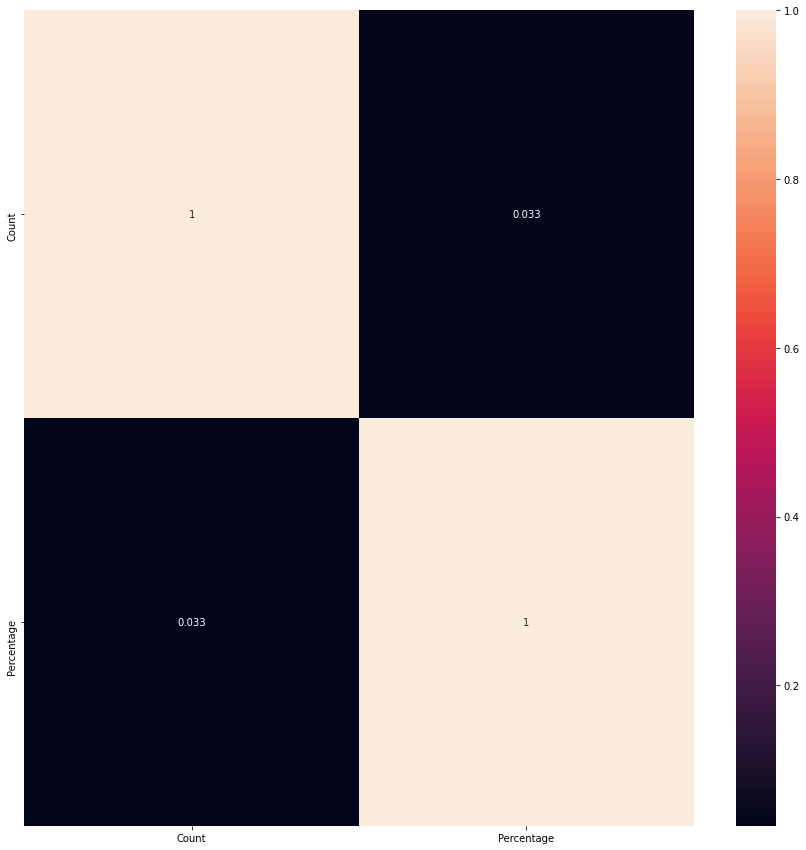

In [11]:
#Visualizing correlation
plt.figure(figsize = (15,15))
corr = df.corr()
sns.heatmap(corr, annot = True)

In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df['Segment Type'] = le.fit_transform(df['Segment Type'])
df['Segment Description'] = le.fit_transform(df['Segment Description'])
df['Answer'] = le.fit_transform(df['Answer'])
df['It became a Relationship'] = le.fit_transform(df['It became a Relationship'])

In [13]:
df.head()

,Segment Type,Segment Description,Answer,Count,Percentage,It became a Relationship
0,1,54,2,797,0.207,1
1,1,54,1,1969,0.511,0
2,1,54,0,1090,0.283,1
3,3,145,2,0,0.000,0
4,3,145,1,0,0.000,0


In [14]:
x = df.iloc[:, :-2]
y = df.iloc[:, -1]

In [15]:
x

,Segment Type,Segment Description,Answer,Count
0,1,54,2,797
1,1,54,1,1969
2,1,54,0,1090
3,3,145,2,0
4,3,145,1,0
...,...,...,...,...
448,2,5,1,4
449,2,5,0,1
450,2,6,2,2
451,2,6,1,3


In [16]:
y

0      1
1      0
2      1
3      0
4      0
      ..
448    1
449    0
450    1
451    0
452    0
Name: It became a Relationship, Length: 453, dtype: int32

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [18]:
x

array([[-3.80313758, -0.48177304,  1.22474487,  5.66062454],
       [-3.80313758, -0.48177304,  0.        , 14.2250724 ],
       [-3.80313758, -0.48177304, -1.22474487,  7.8017365 ],
       ...,
       [ 0.10348674, -1.58296856,  1.22474487, -0.1488772 ],
       [ 0.10348674, -1.58296856,  0.        , -0.14156965],
       [ 0.10348674, -1.58296856, -1.22474487, -0.15618475]])

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0, test_size = 0.25)

In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
acc_list = []
err_list = []
for i in range(1,25):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test,y_pred)

    acc_list.append(acc)
    err_list.append(1-acc)

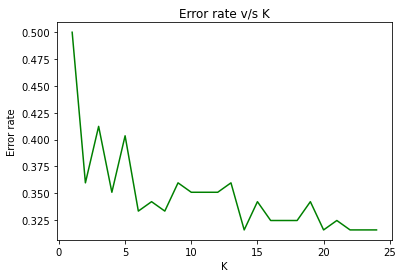

In [23]:
plt.plot(list(range(1,25)),err_list,c= 'g')
plt.title('Error rate v/s K')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()

In [24]:
model = KNeighborsClassifier(n_neighbors=6)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [25]:
confusion_matrix(y_test,y_pred)

array([[74,  4],
       [34,  2]], dtype=int64)

In [26]:
accuracy_score(y_test,y_pred)

0.6666666666666666